## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Network Traffic
**Steps**:
1. Extract Features from Dataset:
    - Load `network_traffic.csv` .
2. Isolation Forest Model
3. Display Anomalies

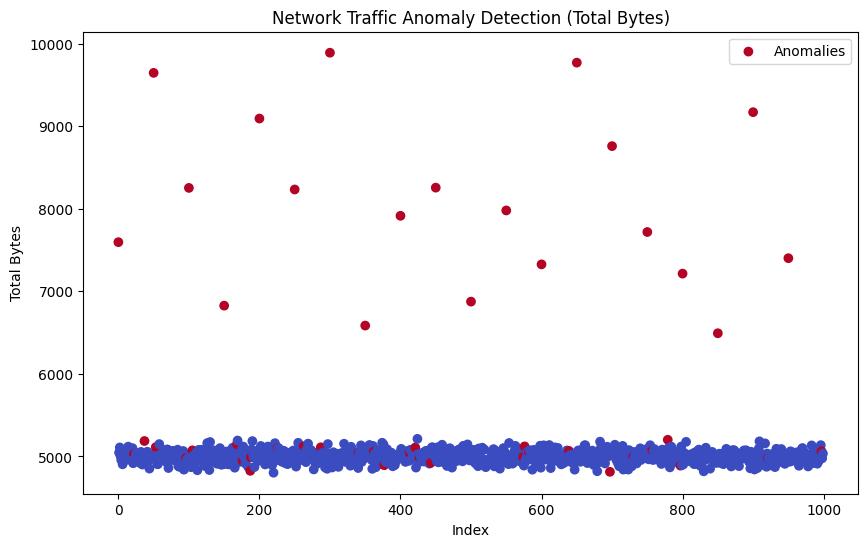

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
np.random.seed(42)
rows = 1000
df = pd.DataFrame({
    'Total Packets': np.random.poisson(100, rows),
    'Total Bytes': np.random.poisson(5000, rows),
    'Avg Packet Size': np.random.normal(500, 50, rows),
    'Packet Rate': np.random.normal(100, 10, rows),
    'Byte Rate': np.random.normal(5000, 500, rows)
})
df.iloc[::50] += np.random.randint(1000, 5000, size=(20, 5))
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso_forest.fit_predict(df)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})  # 1 = anomaly
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Total Bytes'], c=df['anomaly'], cmap='coolwarm', label='Anomalies')
plt.title('Network Traffic Anomaly Detection (Total Bytes)')
plt.xlabel('Index')
plt.ylabel('Total Bytes')
plt.legend()
plt.show()
